# Prepare the HAM10K and the ISIC dataset according to our use case

Rough Gameplan
- Load the datasets
-   Inspect the datasets
-   Define the shared classes
-   Filter by shared classes
-   Inspect filtered datatsets
-   Set a resizing format
-   Preprocess datasets
-   Save Datasets

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## HAM10K

### Load the data

In [9]:
ham = pd.read_csv('data/ham10k/hmnist_28_28_RGB.csv')
ham

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,183,165,181,182,165,180,184,166,182,188,...,208,185,187,208,186,186,206,187,189,0
10011,2,3,1,38,33,32,121,104,103,132,...,96,79,76,24,23,21,3,4,1,0
10012,132,118,118,167,149,149,175,156,160,184,...,204,181,178,181,159,153,172,151,145,0
10013,160,124,146,164,131,152,167,127,146,169,...,185,162,167,184,157,166,185,162,172,0


In [10]:
#Filter for nevus and melanoma
ham = ham[(ham['label'] == 3) | (ham['label'] == 4)]
# Separate labels
ham_y = ham.pop('label')
ham_y = np.asarray(ham_y)

# Reshape image data
ham = ham.to_numpy()
ham = np.reshape(ham, (len(ham), 28, 28, 3))

In [13]:
np.unique(ham_y, return_counts=True)

(array([3, 4]), array([ 115, 6705]))

In [14]:
ham = ham / 255
ham = tf.data.Dataset.from_tensor_slices(ham)
ham = ham.map(lambda x: tf.cast(x, tf.float32))

ham_y = tf.data.Dataset.from_tensor_slices(ham_y)
ham_y = ham_y.map(lambda x: tf.one_hot(x, 2))

ds = tf.data.Dataset.zip((ham, ham_y))
ds.save('data/ham10k/ham10k_tf_nvmel', compression='GZIP')

2023-09-21 11:31:45.165753: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


## ISIC

In [15]:
import os
from PIL import Image

In [16]:
feature_names = [x for x in os.listdir('data/Isic/Train') if not x.startswith('.')]
idx = [4, 3, -1, 0, 2, 1, -2, -4, -3]
feature_names = [feature_names[x] for x in idx]
feature_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [17]:
list_of_images = [val for sublist in [[os.path.join(i[0], j) for j in i[2]] for i in os.walk('data/Isic/Train')] for val in sublist][1:]

In [18]:
zuweisungen = [0, 1, 2, 3, 4, 6, 6, 505, 5]

features = dict(zip(feature_names, zuweisungen))

isic = np.zeros((2240-182, 28, 28, 3))
isic_y = list()

i = 0
for path in list_of_images:
    if 'squamous' in path:
        continue
    for feature in features.keys():
        if feature in path:
            isic[i] = Image.open(path).resize((28, 28))
            isic_y.append(features[feature])
            i += 1
            continue

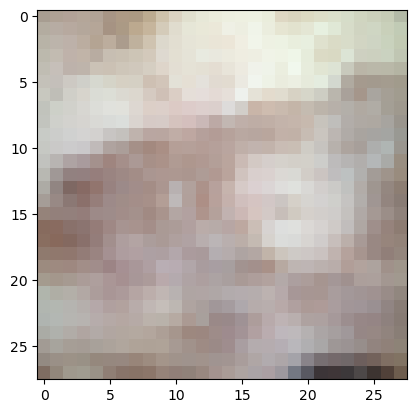

In [19]:
isic = isic.astype(int)

plt.imshow(isic[123])
plt.show()

In [21]:
isic_y

[3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,


In [26]:
isic_y = np.asarray(isic_y)
filter_nvml = (isic_y == 3) | (isic_y == 4)
isic_y = isic_y[filter_nvml]
isic = isic[filter_nvml]

In [27]:
isic = isic / 255
isic = tf.data.Dataset.from_tensor_slices(isic)
isic = isic.map(lambda x: tf.cast(x, tf.float32))

isic_y = tf.data.Dataset.from_tensor_slices(isic_y)
isic_y = isic_y.map(lambda x: tf.one_hot(x, 2))

ds = tf.data.Dataset.zip((isic, isic_y))
ds.save('data/Isic/isic_tf', compression='GZIP')

#### Same for Test Images

In [30]:
list_of_images = [val for sublist in [[os.path.join(i[0], j) for j in i[2]] for i in os.walk('data/Isic/Test')] for val in sublist][1:]

isic = np.zeros((182, 28, 28, 3))
isic_y = list()

i = 0
for path in list_of_images:
    if 'squamous' in path:
        continue
    for feature in features.keys():
        if feature in path:
            isic[i] = Image.open(path).resize((28, 28))
            isic_y.append(features[feature])
            i += 1
            continue

isic_y = np.asarray(isic_y)
filter_nvml = (isic_y == 3) | (isic_y == 4)
isic_y = isic_y[filter_nvml]
isic = isic[filter_nvml]

isic = isic / 255
isic = tf.data.Dataset.from_tensor_slices(isic)
isic = isic.map(lambda x: tf.cast(x, tf.float32))

isic_y = tf.data.Dataset.from_tensor_slices(isic_y)
isic_y = isic_y.map(lambda x: tf.one_hot(x, 7))

ds = tf.data.Dataset.zip((isic, isic_y))
ds.save('data/Isic/isic_tf_test', compression='GZIP')

IndexError: boolean index did not match indexed array along dimension 0; dimension is 182 but corresponding boolean dimension is 102

In [22]:
feats = ['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'vascular lesion',
 'seboherreic- & pigmented benign keratosis']

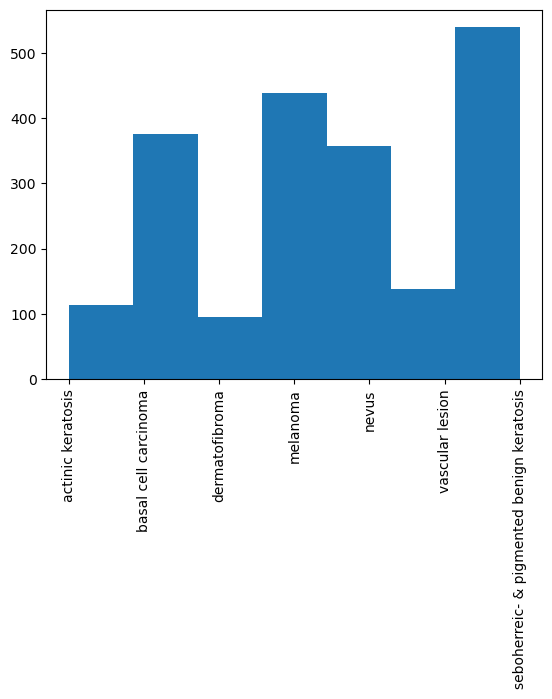

In [34]:
#feature_names.remove('squamous cell carcinoma')

plt.hist(isic_y, bins=7)
plt.xticks([x for x in range(7)], feats, rotation=90)
plt.show()

In [14]:
np.unique(isic_y)

array([0, 1, 2, 3, 4, 5, 6])